In [1]:
import pandas as pd
import scipy.stats
from pylab import *
import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "-"

In [3]:
TAG_VALS = {
    0: "Control",
    1: "Case",
}

In [4]:
FNAME = "ca"

In [5]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")
df.rename(columns={'tag': 'status'}, inplace=True)
df["status"] = df["status"].replace(TAG_VALS)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Control
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Case
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Case
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Control
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,Case
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,Case
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Case
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Case


In [6]:
case_df = df.loc[df['status'] == 'Case', [f'{FNAME}']]
control_df = df.loc[df['status'] == 'Control', [f'{FNAME}']]

In [7]:
control_lst = list(control_df[f"{FNAME}"].values)
case_lst = list(case_df[f"{FNAME}"].values)

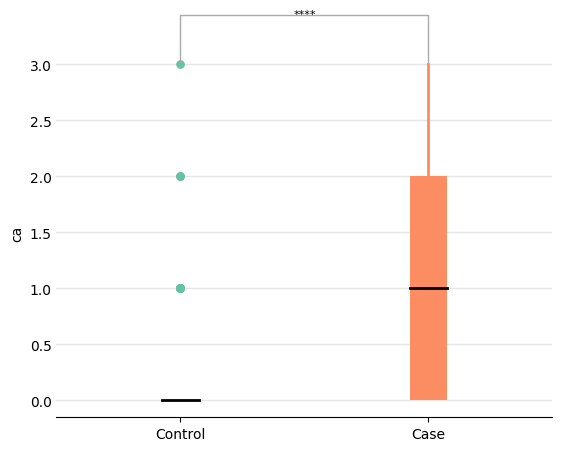

In [8]:
fig = figure()
ax = fig.add_subplot(111)

bp = ax.boxplot([control_lst, case_lst])

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4, 4]
}
rcParams.update(params)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

from palettable.colorbrewer.qualitative import Set2_7
colors = Set2_7.mpl_colors

# colors = ['#fbb4b9', '#c51b8a']

for i in range(0, len(bp['boxes'])):

    bp['boxes'][i].set_color(colors[i])
   # we have two whiskers!
    bp['whiskers'][i*2].set_color(colors[i])
    bp['whiskers'][i*2 + 1].set_color(colors[i])
    bp['whiskers'][i*2].set_linewidth(2)
    bp['whiskers'][i*2 + 1].set_linewidth(2)
   # fliers
   # (set allows us to set many parameters at once)
    bp['fliers'][i].set(markerfacecolor=colors[i],
                   marker='o', alpha=0.75, markersize=6,
                   markeredgecolor='none')
    bp['medians'][i].set_color('black')
    bp['medians'][i].set_linewidth(2)
   # and 4 caps to remove
    for c in bp['caps']:
        c.set_linewidth(0)
        
    for i in range(len(bp['boxes'])):
        box = bp['boxes'][i]
        box.set_linewidth(0)
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
            boxCoords = list(zip(boxX,boxY))
            boxPolygon = Polygon(boxCoords, facecolor = colors[i], linewidth=0)
            ax.add_patch(boxPolygon)
ax.set_xticklabels(['Control','Case'])
# ax.set_yticklabels(["HOMA"])

z, p = scipy.stats.mannwhitneyu(control_lst, case_lst)
p_value = p * 2
s = stars(p)

y_max = np.max(np.concatenate((control_lst, case_lst)))
y_min = np.min(np.concatenate((control_lst, case_lst)))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
ax.text(1.5, y_max + abs(y_max - y_min)*0.15, stars(p_value),
       horizontalalignment='center',
       verticalalignment='center')
plt.ylabel(f"{FNAME}")
plt.show()
# plt.savefig(f"./figures/box_plots/boxplot_{FNAME}.png", bbox_inches="tight", dpi=300)

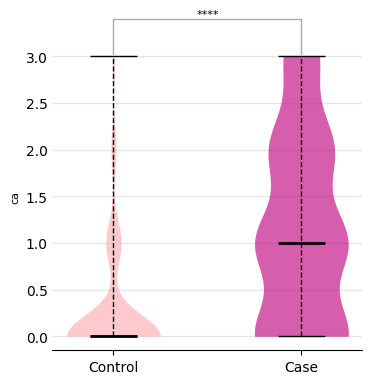

In [9]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from matplotlib.patches import Polygon

# ... Your homa_control_lst and homa_case_lst data go here ...

fig = plt.figure(figsize=[4, 4])
ax = fig.add_subplot(111)

vp = ax.violinplot([control_lst, case_lst], showmedians=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

# from palettable.colorbrewer.qualitative import Set2_7
# colors = Set2_7.mpl_colors
colors = ['#fbb4b9', '#c51b8a']

for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors[i])
    body.set_edgecolor(colors[i])
    body.set_linewidth(0)  # If you want no border around the violins
    body.set_alpha(0.7)

vp['cmedians'].set_edgecolor('black')
vp['cmedians'].set_linewidth(2)

vp['cbars'].set_edgecolor('black')
vp['cbars'].set_linestyle('--')
vp['cbars'].set_linewidth(1)

vp['cmins'].set_edgecolor('black')
vp['cmins'].set_linewidth(1)

vp['cmaxes'].set_edgecolor('black')
vp['cmaxes'].set_linewidth(1)


ax.set_xticks([1, 2])
ax.set_xticklabels(['Control', 'Case'])
plt.ylabel(f"{FNAME}")

z, p = scipy.stats.mannwhitneyu(control_lst, case_lst)
p_value = p * 2


y_max = np.max(np.concatenate((control_lst, case_lst)))
y_min = np.min(np.concatenate((control_lst, case_lst)))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
ax.text(1.5, y_max + abs(y_max - y_min) * 0.15, stars(p_value),
        horizontalalignment='center',
        verticalalignment='center')

plt.show()
# plt.savefig(f"./figures/violin_plots/violin_{FNAME}.png", bbox_inches="tight", dpi=300)